## ETAPA 3: UNIÓN DE DATOS Y REDUCCIÓN DE VARIABLES

In [1]:
# Dependencias básicas
import pandas as pd
import numpy as np

# Dependencias de visualización
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt

# Dependencias de machine learning
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact

### *Importar Dataframes*

In [2]:
# Importación de datasets
inmigrantes_data = pd.read_csv("../13 - Exports (preprocesamiento)/top_inmigracion_2008_2022.csv")
indices_democracia = pd.read_csv("../13 - Exports (preprocesamiento)/indices_democracia.csv")
indices_desarrollo = pd.read_csv("../13 - Exports (preprocesamiento)/indices_desarrollo.csv")
regiones = pd.read_csv("../13 - Exports (preprocesamiento)/continentes_regiones.csv")
libertad = pd.read_csv("../13 - Exports (preprocesamiento)/libertad.csv")
conflictos_armados = pd.read_csv("../13 - Exports (preprocesamiento)/muertes_conflictos_armados.csv")
residentes = pd.read_csv("../13 - Exports (preprocesamiento)/residentes.csv")
regimen_politico = pd.read_csv("../13 - Exports (preprocesamiento)/regimen_politico.csv")
homicidios = pd.read_csv("../13 - Exports (preprocesamiento)/tasa_homicidios.csv")
turismo = pd.read_csv("../13 - Exports (preprocesamiento)/turismo.csv")


In [3]:
# Lista con todos los df
dataframes = [inmigrantes_data, indices_democracia, indices_desarrollo, regiones, libertad, conflictos_armados, residentes, regimen_politico, homicidios, turismo]

# Funcion para obtener el nombre de cada dataframe
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# Bucle para mostrar por pantalla cada dataframe
with pd.option_context('expand_frame_repr', False):
    for df in dataframes:
        print (f'------------->>>>>>>>>>> {get_df_name(df)} <<<<<<<<<<<<----------------\n')
        print (df)
        print ('\n')

------------->>>>>>>>>>> inmigrantes_data <<<<<<<<<<<<----------------

      Year Nationality code      Sex Age group  Immigrant count
0     2008              DZA     Both    0 - 14              759
1     2008              PER    Males   35 - 44             2938
2     2008              PER    Males   45 - 54             1128
3     2008              PER    Males   55 - 64              265
4     2008              PER    Males       65+              156
...    ...              ...      ...       ...              ...
9355  2022              PAK    Males   55 - 64              330
9356  2022              PAK  Females   55 - 64              146
9357  2022              PAK     Both       65+              169
9358  2022              PAK    Males       65+               99
9359  2022              PAK  Females       65+               70

[9360 rows x 5 columns]


------------->>>>>>>>>>> indices_democracia <<<<<<<<<<<<----------------

    Nationality code  Year  Liberal democracy index  Delibe

### *Merge dataframes en el conjunto de datos de inmigración*

In [4]:
# Hacer una copia de datos de inmigrantes para los merge
inmigrantes = inmigrantes_data.copy()
inmigrantes

,Year,Nationality code,Sex,Age group,Immigrant count
0,2008,DZA,Both,0 - 14,759
1,2008,PER,Males,35 - 44,2938
2,2008,PER,Males,45 - 54,1128
3,2008,PER,Males,55 - 64,265
4,2008,PER,Males,65+,156
...,...,...,...,...,...
9355,2022,PAK,Males,55 - 64,330
9356,2022,PAK,Females,55 - 64,146
9357,2022,PAK,Both,65+,169
9358,2022,PAK,Males,65+,99


In [5]:
# Renombrar columna de codigo de país como el df "inmigrantes"
residentes.rename({'Country Code' : 'Nationality code'}, 
                  inplace = True, 
                  axis = 1)

libertad.rename({'Country code' : 'Nationality code'}, 
                inplace = True, 
                axis = 1)

# Merge cada df en "inmigrantes"
inmigrantes_merge = inmigrantes.merge(indices_democracia, on = ['Year', 'Nationality code'], how = 'left')\
                               .merge(regiones, on = ['Nationality code'], how = 'left')\
                               .merge(libertad, on = ['Year', 'Nationality code'], how = 'left')\
                               .merge(conflictos_armados, on = ['Year', 'Nationality code'], how = 'left')\
                               .merge(residentes, on = ['Year', 'Nationality code', 'Sex'], how = 'left')\
                               .merge(regimen_politico, on = ['Year', 'Nationality code'], how = 'left')\
                               .merge(homicidios, on = ['Year', 'Nationality code'], how = 'left')\
                               .merge(turismo, on = ['Year'], how = 'left')\

inmigrantes_merge.info()
inmigrantes_merge.iloc[:, :15]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             9360 non-null   int64  
 1   Nationality code                 9360 non-null   object 
 2   Sex                              9360 non-null   object 
 3   Age group                        9360 non-null   object 
 4   Immigrant count                  9360 non-null   int64  
 5   Liberal democracy index          9360 non-null   float64
 6   Deliberative democracy index     9360 non-null   float64
 7   Continent                        9360 non-null   object 
 8   Sub-region                       9360 non-null   object 
 9   Absence of Corruption            9360 non-null   float64
 10  Civil Liberties                  9360 non-null   float64
 11  Civil rights                     7200 non-null   float64
 12  Educational equality

,Year,Nationality code,Sex,Age group,Immigrant count,Liberal democracy index,Deliberative democracy index,Continent,Sub-region,Absence of Corruption,Civil Liberties,Civil rights,Educational equality,Equal opportunity,Health equality
0,2008,DZA,Both,0 - 14,759,0.164,0.249,Africa,Africa,0.38,0.49,0.44,0.59,0.33,0.61
1,2008,PER,Males,35 - 44,2938,0.649,0.646,America,South America,0.49,0.72,0.56,0.35,0.44,0.40
2,2008,PER,Males,45 - 54,1128,0.649,0.646,America,South America,0.49,0.72,0.56,0.35,0.44,0.40
3,2008,PER,Males,55 - 64,265,0.649,0.646,America,South America,0.49,0.72,0.56,0.35,0.44,0.40
4,2008,PER,Males,65+,156,0.649,0.646,America,South America,0.49,0.72,0.56,0.35,0.44,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,2022,PAK,Males,55 - 64,330,0.234,0.301,Asia,Asia,0.36,0.48,0.22,0.18,0.22,0.27
9356,2022,PAK,Females,55 - 64,146,0.234,0.301,Asia,Asia,0.36,0.48,0.22,0.18,0.22,0.27
9357,2022,PAK,Both,65+,169,0.234,0.301,Asia,Asia,0.36,0.48,0.22,0.18,0.22,0.27
9358,2022,PAK,Males,65+,99,0.234,0.301,Asia,Asia,0.36,0.48,0.22,0.18,0.22,0.27


In [6]:
inmigrantes_merge.iloc[:, 15:]

,Judicial accountability,Public sector corrupt exchanges,One-sided violence_deaths,Non-state_deaths,Intrastate_deaths,Interstate_deaths,Number of residents,Political regime,Homicide Rate,Number of Turist
0,0.39,0.35,0,0,345,0,51922,3,0.95,44400000
1,0.44,0.30,0,0,40,0,60185,7,5.27,44400000
2,0.44,0.30,0,0,40,0,60185,7,5.27,44400000
3,0.44,0.30,0,0,40,0,60185,7,5.27,44400000
4,0.44,0.30,0,0,40,0,60185,7,5.27,44400000
...,...,...,...,...,...,...,...,...,...,...
9355,0.22,0.23,68,0,670,0,68821,6,4.21,59310000
9356,0.22,0.23,68,0,670,0,31675,6,4.21,59310000
9357,0.22,0.23,68,0,670,0,100496,6,4.21,59310000
9358,0.22,0.23,68,0,670,0,68821,6,4.21,59310000


In [7]:
# Contar datos nulos
inmigrantes_merge.isnull().sum()

Year                                  0
Nationality code                      0
Sex                                   0
Age group                             0
Immigrant count                       0
Liberal democracy index               0
Deliberative democracy index          0
Continent                             0
Sub-region                            0
Absence of Corruption                 0
Civil Liberties                       0
Civil rights                       2160
Educational equality                  0
Equal opportunity                  2160
Health equality                       0
Judicial accountability               0
Public sector corrupt exchanges       0
One-sided violence_deaths             0
Non-state_deaths                      0
Intrastate_deaths                     0
Interstate_deaths                     0
Number of residents                   0
Political regime                      0
Homicide Rate                       336
Number of Turist                      0


Como observamos en la Etapa 2, no se obtuvieron datos de homicidios para Segal más que para el año 2015, y debido a la cantidad de datos faltantes, se decidió no imputarlos ya que algunos modelos de regresión, como los basados en árboles, aceptan datos nulos. Para el caso de modelos lineales, re removerá a Senegal del conjunto de datos para realizar el modelo de machine learning. 

In [8]:
inmigrantes_merge[inmigrantes_merge['Homicide Rate'].isnull()]['Nationality code'].unique()

array(['SEN'], dtype=object)

#### Añadido de Variables Adicionales

**Idioma Castellano**

Esta variable categórica señala si el idioma castellano es el idioma oficial de un país (sí = 1, no = 0), y con ella se busva incluir el efecto del dominio del mismo idioma hablado en España sobre la desición preferente de este destino por los inmigrantes.

In [9]:
# Cargar datos de Inflación global/anual del banco mundial
spanish_language = pd.read_excel("../3 - Paises Idioma español oficial/paises_hispanohablantes.xlsx")
spanish_language

,Country,Country code,Spanish language
0,Argentina,ARG,1
1,Bolivia,BOL,1
2,Chile,CHL,1
3,Colombia,COL,1
4,Costa Rica,CRI,1
5,Cuba,CUB,1
6,Ecuador,ECU,1
7,El Salvador,SLV,1
8,España,ESP,1
9,Guatemala,GTM,1


In [10]:
# Renombrar columna de codigo
spanish_language.rename({'Country code' : 'Nationality code'},
                        inplace = True, 
                        axis = 1)

# Eliminar columna Country
spanish_language.drop('Country', inplace = True, axis = 1)

# Unir datos a dataset de inmigrantes_merge
inmigrantes_merge = inmigrantes_merge.merge(spanish_language, on = ['Nationality code'], how = 'left')

# Remplazar nulos con "0" en Spanish_language y pasar a tipo entero
inmigrantes_merge['Spanish language'].fillna(0, inplace = True)

# Pasar columna a tipo entero y luego a objeto
inmigrantes_merge['Spanish language'] = inmigrantes_merge['Spanish language'].astype(int).astype(object)

# Verificar correcta adicion
inmigrantes_merge.groupby('Nationality code')["Spanish language"].value_counts()

Nationality code  Spanish language
ARG               1                   360
BGR               0                   360
BRA               0                   360
CHN               0                   360
COL               1                   360
CUB               1                   360
DEU               0                   360
DOM               1                   360
DZA               0                   360
ECU               1                   360
FRA               0                   360
GBR               0                   360
HND               1                   360
ITA               0                   360
MAR               0                   360
NIC               1                   360
PAK               0                   360
PER               1                   360
PRT               0                   360
PRY               1                   360
ROU               0                   360
RUS               0                   360
SEN               0                   360

**Pandemia y Post-pandemia**

La variable categórica relacionada a la Pandemia señala si la presencia de restricciones sanitarias debidas al COVID durante los años 2020 y 2021 (Restricciones_pandemia = 1), y con ella se busca incluir el efecto de dichas restricciones en la variación del número de inmigrantes que llegaron a España.

Así mismo, también se incluye una variable "Año post_pandemia" para considerar la acumulación de inmigrantes durante las restricciones sanitarias entre 2020-2021, los cuáles no lograron viajar a España, y así incluir la particularidad del año 2022 al ser el primer año después de la flexibilización casi total de las restricciones.

In [11]:
# Añadir Variable Pandemia
inmigrantes_merge["Restricciones_pandemia"] = inmigrantes_merge["Year"].apply(lambda x: 1 if x==2020 or x==2021 else 0)

# Pasar a tipo objeto
inmigrantes_merge["Restricciones_pandemia"] = inmigrantes_merge["Restricciones_pandemia"].astype(object)

# Verificar adicion
inmigrantes_merge.groupby('Year')["Restricciones_pandemia"].value_counts()

Year  Restricciones_pandemia
2008  0                         624
2009  0                         624
2010  0                         624
2011  0                         624
2012  0                         624
2013  0                         624
2014  0                         624
2015  0                         624
2016  0                         624
2017  0                         624
2018  0                         624
2019  0                         624
2020  1                         624
2021  1                         624
2022  0                         624
Name: count, dtype: int64

In [12]:
# Añadir Variable Post-pandemia
inmigrantes_merge["Año post_pandemia"] = inmigrantes_merge["Year"].apply(lambda x: 1 if x==2022 else 0)

# Pasar a tipo objeto
inmigrantes_merge["Año post_pandemia"] = inmigrantes_merge["Año post_pandemia"].astype(object)

# Verificar adicion
inmigrantes_merge.groupby('Year')["Año post_pandemia"].value_counts()

Year  Año post_pandemia
2008  0                    624
2009  0                    624
2010  0                    624
2011  0                    624
2012  0                    624
2013  0                    624
2014  0                    624
2015  0                    624
2016  0                    624
2017  0                    624
2018  0                    624
2019  0                    624
2020  0                    624
2021  0                    624
2022  1                    624
Name: count, dtype: int64

**Turistas / X??**

Todavia estoy pensando qué relacion podemos hacer... ¿con residentes?

#### REDUCCIÓN DE VARIABLES

In [13]:
inmigrantes_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             9360 non-null   int64  
 1   Nationality code                 9360 non-null   object 
 2   Sex                              9360 non-null   object 
 3   Age group                        9360 non-null   object 
 4   Immigrant count                  9360 non-null   int64  
 5   Liberal democracy index          9360 non-null   float64
 6   Deliberative democracy index     9360 non-null   float64
 7   Continent                        9360 non-null   object 
 8   Sub-region                       9360 non-null   object 
 9   Absence of Corruption            9360 non-null   float64
 10  Civil Liberties                  9360 non-null   float64
 11  Civil rights                     7200 non-null   float64
 12  Educational equality

#### *Correlaciones*

<Axes: >

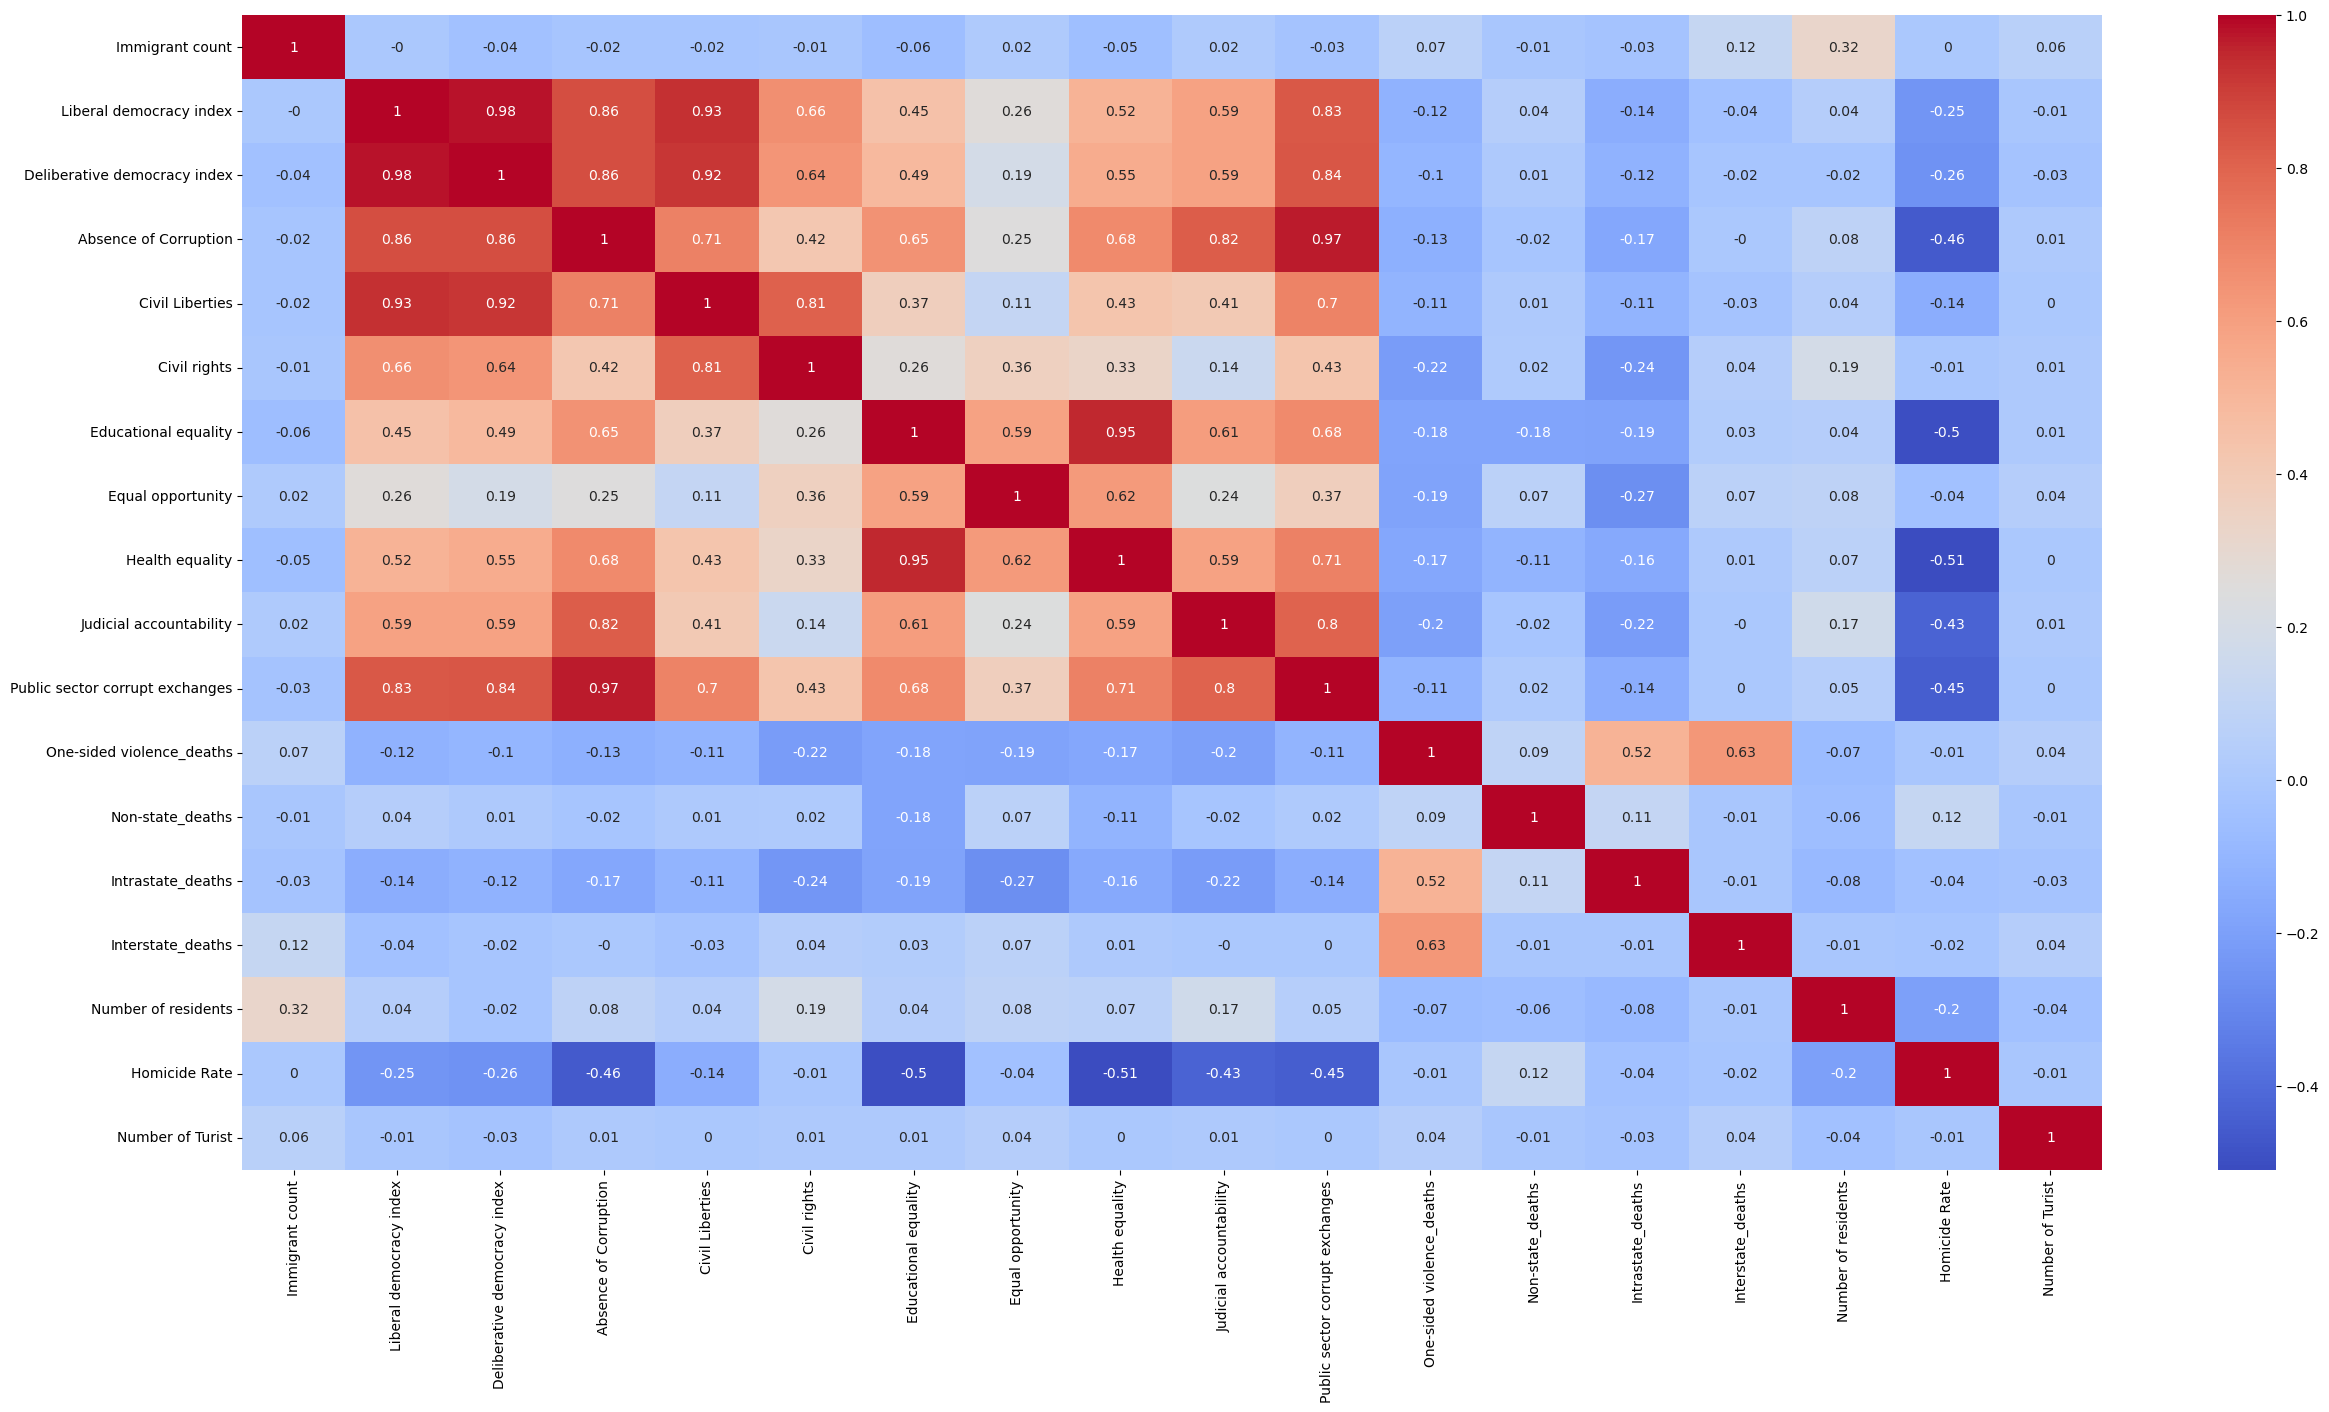

In [14]:
# Pasar la variable de tipo de regimen politico a objeto
inmigrantes_merge['Political regime'] = inmigrantes_merge['Political regime'].astype(object)

# Construir matriz de correlacion de variable cuantitativas
plt.figure(figsize=(30,15))
sns.heatmap(round(inmigrantes_merge.iloc[:, 4:].corr(numeric_only = True), 2), annot = True, cmap= 'coolwarm')

#### *Significancia de Variable Categóricas* (evaluar contrastes de hipotesis parametricos o no parametricos frente a la variable target de conteo de inmigrantes)

- Sex/Age (hacer contraste pareado - aqui puede que sexo no de significativo, pero puede que la interaccion sexo-edad sí, habría que verse)
- Political regime (por la cantidad de paises en cada grupo que vi en el EDA, es probable que de significativa)
- Continente (las geográficas tambien vi mayor cantidad de paises del top en america, asi que seguramente ambas dan significativas)
- Sub-region
- Lengua castellana (esta seguro tambien da porque tenemos muchos hispano hablantes en el top con alta inmigracion, como VEN y COL)

#### *Reduccion al momento de hacer los modelos??*

*Nota: Adicionalmente, se usarán otros métodos dependiendo del tipo de modelo de machine learning a usar, lineal o de arboles, como regularizacion L1/L2 y eliminación recursiva de variables con modelos de árboles.*